# Last scan: different spheroid

Only include trials with:
- `df_main['TRIAL_TO_INCLUDE'] = 'Y'` (deemed unusable due to various data collection issues)
- `TrialProcessor.trial_usable = True` (has usable data from all systems)

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from pp_utils.core import generate_data_path_dict, MISC_PARAMS
from pp_utils.file_handling import df_main_loader
from pp_utils.trial_processor import TrialProcessor
from pp_utils import utils, utils_plot

In [3]:
import pickle

## Set paths, load main info df and clusters

In [4]:
data_path = generate_data_path_dict(Path("../data_processed/"))
raw_path = Path("../data_raw/")

### Data and output path

In [5]:
output_path = data_path["main"] / "data_summary"
tp_path = output_path / "trial_processor_object"

In [6]:
fig_path = Path("../figs")
if not fig_path.exists():
    fig_path.mkdir()

### Load main dataframe

In [7]:
df_main = df_main_loader(
    folder=data_path["info_csv"], filename="main_info_append_09.csv",
)

### Load compiled trial info

In [8]:
df_summary = pd.read_csv(output_path / "data_summary_all.csv", index_col=0)

In [9]:
df_summary["TRIAL_TO_INCLUDE"] = df_main["TRIAL_TO_INCLUDE"]

In [10]:
df_summary["TCCT"] = df_main["LEFT"] + df_main["RIGHT"]

## Spheroid names and colors

In [11]:
SPH_COLORS = ["w", "gainsboro", "darkgrey"]  # L, M, S

In [12]:
SPH_STR = ["L", "M", "S"]
SPH_LABEL = ["AR=2.9", "AR=1.3", "AR=1.1"]

In [13]:
sph_tcct = [f"{sph}_{tcct_type}" for sph, tcct_type in zip(["L", "M", "S"]*2, ["TC"]*3+["CT"]*3)]

In [14]:
sph_tcct

['L_TC', 'M_TC', 'S_TC', 'L_CT', 'M_CT', 'S_CT']

## Duration of last scan

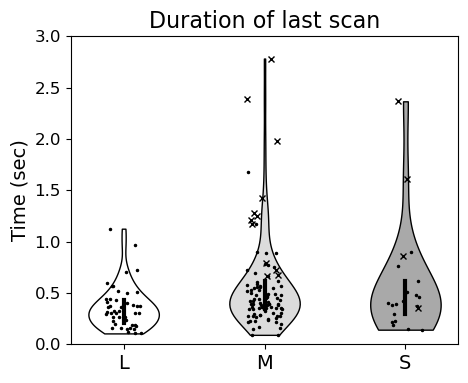

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for sph_seq, sph in enumerate(["L", "M", "S"]):

    sph_index = (
        (df_summary["SPHEROID"]==sph)
        & (df_summary["CHOICE"]==1) &
        (df_summary["TRIAL_TO_INCLUDE"] == "Y")
    )
    df_wanted = df_summary[sph_index].copy()
    
    # trials with buzz before decision
    idx_cross = df_wanted["time_buzz_onset_clean"] < df_wanted["time_decision"]
    
    vals_dot = df_wanted["time_last_nonchosen"][~idx_cross].values
    vals_cross = df_wanted["time_last_nonchosen"][idx_cross].values
    
    vals = np.hstack((vals_dot, vals_cross))
    vals = vals[~np.isnan(vals)]
    
    utils_plot.plot_vio(ax, vals, sph_seq, color=SPH_COLORS[sph_seq], qbar_alpha=1, alpha=1)
    utils_plot.plot_jitter(ax, sph_seq, vals_dot, color="k", marker=".", markersize=3)
    utils_plot.plot_jitter(ax, sph_seq, vals_cross, color="k", marker="x", markersize=5)

ax.set_title("Duration of last scan", fontsize=16)
ax.set_ylabel("Time (sec)", fontsize=14)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(["L", "M", "S"], fontsize=14)
ax.set_yticks(np.arange(0, 3.5, 0.5))
ax.set_yticklabels(np.arange(0, 3.5, 0.5), fontsize=12)
ax.set_ylim(0, 3)

plt.show()

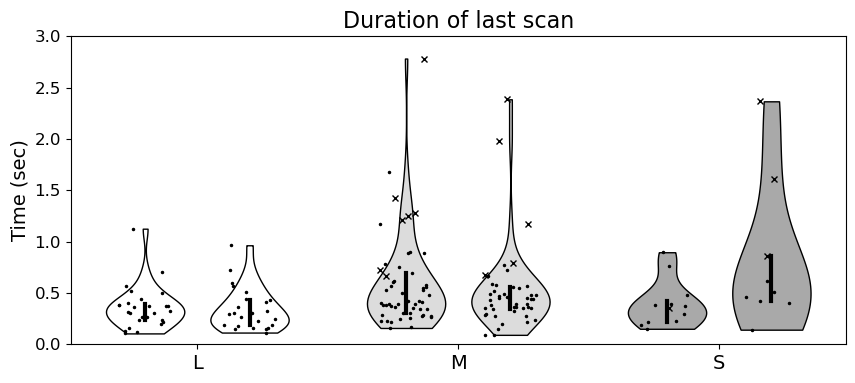

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# ==============
# TC trials
# ==============
for sph_seq, sph in enumerate(["L", "M", "S"]):

    sph_index = (
        (df_summary["SPHEROID"] == sph)
        & (df_summary["CHOICE"] == 1)
        & df_summary["TRIAL_TO_INCLUDE"]
        & (df_summary["TCCT"] == "TC")
    )
    df_wanted = df_summary[sph_index].copy()
    
    # trials with buzz before decision
    idx_cross = df_wanted["time_buzz_onset_clean"] < df_wanted["time_decision"]
    
    vals_dot = df_wanted["time_last_nonchosen"][~idx_cross].values
    vals_cross = df_wanted["time_last_nonchosen"][idx_cross].values
    
    vals = np.hstack((vals_dot, vals_cross))
    vals = vals[~np.isnan(vals)]
    
    utils_plot.plot_vio(
        ax, vals, sph_seq-0.2, widths=0.3, color=SPH_COLORS[sph_seq], qbar_alpha=1, alpha=1
    )
    utils_plot.plot_jitter(
        ax, sph_seq-0.2, vals_dot, width=0.2, color="k", marker=".", markersize=3
    )
    utils_plot.plot_jitter(
        ax, sph_seq-0.2, vals_cross, width=0.2, color="k", marker="x", markersize=5
    )

# ==============
# CT trials
# ==============
for sph_seq, sph in enumerate(["L", "M", "S"]):

    sph_index = (
        (df_summary["SPHEROID"] == sph)
        & (df_summary["CHOICE"] == 1)
        & df_summary["TRIAL_TO_INCLUDE"]
        & (df_summary["TCCT"] == "CT")
    )
    df_wanted = df_summary[sph_index].copy()
    
    # trials with buzz before decision
    idx_cross = df_wanted["time_buzz_onset_clean"] < df_wanted["time_decision"]
    
    vals_dot = df_wanted["time_last_nonchosen"][~idx_cross].values
    vals_cross = df_wanted["time_last_nonchosen"][idx_cross].values
    
    vals = np.hstack((vals_dot, vals_cross))
    vals = vals[~np.isnan(vals)]
    
    utils_plot.plot_vio(
        ax, vals, sph_seq+0.2, widths=0.3, color=SPH_COLORS[sph_seq], qbar_alpha=1, alpha=1
    )
    utils_plot.plot_jitter(
        ax, sph_seq+0.2, vals_dot, width=0.2, color="k", marker=".", markersize=3
    )
    utils_plot.plot_jitter(
        ax, sph_seq+0.2, vals_cross, width=0.2, color="k", marker="x", markersize=5
    )

    
ax.set_title("Duration of last scan", fontsize=16)
ax.set_ylabel("Time (sec)", fontsize=14)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(["L", "M", "S"], fontsize=14)
ax.set_yticks(np.arange(0, 3.5, 0.5))
ax.set_yticklabels(np.arange(0, 3.5, 0.5), fontsize=12)
ax.set_ylim(0, 3)

plt.show()

## Inpsection angle during last scan

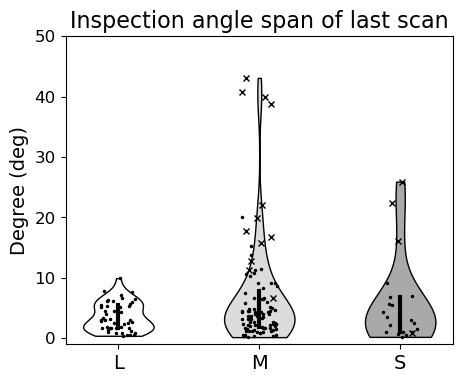

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for sph_seq, sph in enumerate(["L", "M", "S"]):

    sph_index = (
        (df_summary["SPHEROID"]==sph)
        & (df_summary["CHOICE"]==1) &
        (df_summary["TRIAL_TO_INCLUDE"] == "Y")
    )
    df_wanted = df_summary[sph_index].copy()
    
    # trials with buzz before decision
    idx_cross = df_wanted["time_buzz_onset_clean"] < df_wanted["time_decision"]
    
    vals_dot = df_wanted["angle_last_scan"][~idx_cross].values
    vals_cross = df_wanted["angle_last_scan"][idx_cross].values
    
    vals = np.hstack((vals_dot, vals_cross))
    vals = vals[~np.isnan(vals)]
    
    utils_plot.plot_vio(ax, vals, sph_seq, color=SPH_COLORS[sph_seq], qbar_alpha=1, alpha=1)
    utils_plot.plot_jitter(ax, sph_seq, vals_dot, color="k", marker=".", markersize=3)
    utils_plot.plot_jitter(ax, sph_seq, vals_cross, color="k", marker="x", markersize=5)

ax.set_title("Inspection angle span of last scan", fontsize=16)
ax.set_ylabel("Degree (deg)", fontsize=14)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(["L", "M", "S"], fontsize=14)
ax.set_yticks(np.arange(0, 55, 10))
ax.set_yticklabels(np.arange(0, 55, 10), fontsize=12)
ax.set_ylim(-1, 50)

plt.show()

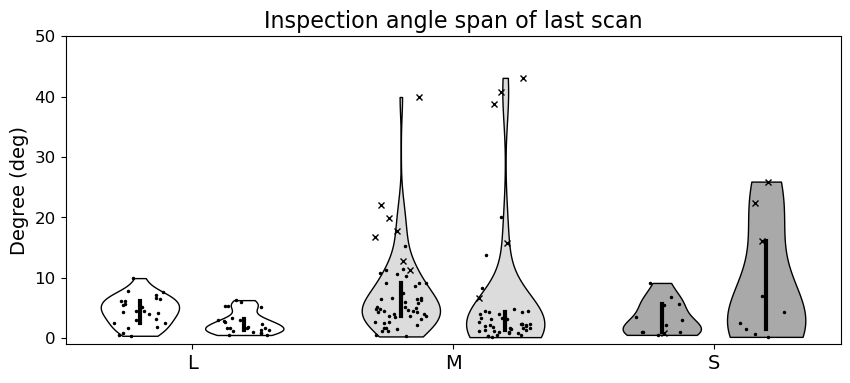

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# ==============
# TC trials
# ==============
for sph_seq, sph in enumerate(["L", "M", "S"]):

    sph_index = (
        (df_summary["SPHEROID"] == sph)
        & (df_summary["CHOICE"] == 1)
        & df_summary["TRIAL_TO_INCLUDE"]
        & (df_summary["TCCT"] == "TC")
    )
    df_wanted = df_summary[sph_index].copy()
    
    # trials with buzz before decision
    idx_cross = df_wanted["time_buzz_onset_clean"] < df_wanted["time_decision"]
    
    vals_dot = df_wanted["angle_last_scan"][~idx_cross].values
    vals_cross = df_wanted["angle_last_scan"][idx_cross].values
    
    vals = np.hstack((vals_dot, vals_cross))
    vals = vals[~np.isnan(vals)]
    
    utils_plot.plot_vio(
        ax, vals, sph_seq-0.2, widths=0.3, color=SPH_COLORS[sph_seq], qbar_alpha=1, alpha=1
    )
    utils_plot.plot_jitter(
        ax, sph_seq-0.2, vals_dot, width=0.2, color="k", marker=".", markersize=3
    )
    utils_plot.plot_jitter(
        ax, sph_seq-0.2, vals_cross, width=0.2, color="k", marker="x", markersize=5
    )

# ==============
# CT trials
# ==============
for sph_seq, sph in enumerate(["L", "M", "S"]):

    sph_index = (
        (df_summary["SPHEROID"] == sph)
        & (df_summary["CHOICE"] == 1)
        & df_summary["TRIAL_TO_INCLUDE"]
        & (df_summary["TCCT"] == "CT")
    )
    df_wanted = df_summary[sph_index].copy()
    
    # trials with buzz before decision
    idx_cross = df_wanted["time_buzz_onset_clean"] < df_wanted["time_decision"]
    
    vals_dot = df_wanted["angle_last_scan"][~idx_cross].values
    vals_cross = df_wanted["angle_last_scan"][idx_cross].values
    
    vals = np.hstack((vals_dot, vals_cross))
    vals = vals[~np.isnan(vals)]
    
    utils_plot.plot_vio(
        ax, vals, sph_seq+0.2, widths=0.3, color=SPH_COLORS[sph_seq], qbar_alpha=1, alpha=1
    )
    utils_plot.plot_jitter(
        ax, sph_seq+0.2, vals_dot, width=0.2, color="k", marker=".", markersize=3
    )
    utils_plot.plot_jitter(
        ax, sph_seq+0.2, vals_cross, width=0.2, color="k", marker="x", markersize=5
    )

    
ax.set_title("Inspection angle span of last scan", fontsize=16)
ax.set_ylabel("Degree (deg)", fontsize=14)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(["L", "M", "S"], fontsize=14)
ax.set_yticks(np.arange(0, 55, 10))
ax.set_yticklabels(np.arange(0, 55, 10), fontsize=12)
ax.set_ylim(-1, 50)

plt.show()

## Track during last scan

In [19]:
def get_last_scan_track(trial_idx):
    
    # Load TrialProcessor object
    tp_obj_fname = tp_path / f"trial_{trial_idx:03d}.pickle"
    with open(tp_obj_fname, "rb") as filein:
        tp = pickle.load(filein)
       
    # Get track and track portion
    df_track = tp.df_track
    df_track_last_scan = df_track[
        (df_track["time_corrected"] > tp.last_scan_start)
        & (df_track["time_corrected"] < tp.last_scan_end)
    ].copy()

    return df_track, df_track_last_scan

In [20]:
# Gather all tracks
df_track_all = {}
df_track_ls_all = {}

for sph, tcct_type in zip(["L", "M", "S"]*2, ["TC"]*3+["CT"]*3):

    sph_index = (
        (df_summary["SPHEROID"]==sph)
        & (df_summary["CHOICE"]==1)
        & (df_summary["TRIAL_TO_INCLUDE"] == "Y")
        & (df_summary["TCCT"] == tcct_type)
    )
    df_wanted = df_summary[sph_index].copy()
    
    print(f"Extracting tracks from spheroid {sph}")
    print(f"Number of tracks: {len(df_wanted)}")
    
    # Loop through all trials
    df_track_tmp = []
    df_track_ls_tmp = []
    for trial_idx in df_wanted.index:
        df_track, df_track_ls = get_last_scan_track(trial_idx)

        df_track_tmp.append(df_track)
        df_track_ls_tmp.append(df_track_ls)
    
    df_track_all[f"{sph}_{tcct_type}"] = df_track_tmp
    df_track_ls_all[f"{sph}_{tcct_type}"] = df_track_ls_tmp

Extracting tracks from spheroid L
Number of tracks: 24
Extracting tracks from spheroid M
Number of tracks: 50
Extracting tracks from spheroid S
Number of tracks: 12
Extracting tracks from spheroid L
Number of tracks: 23
Extracting tracks from spheroid M
Number of tracks: 46
Extracting tracks from spheroid S
Number of tracks: 9


## Plot TC and CT tracks separately

In [21]:
AR_NAME = {
    "L": "AR=2.9",
    "M": "AR=1.3",
    "S": "AR=1.1"
}

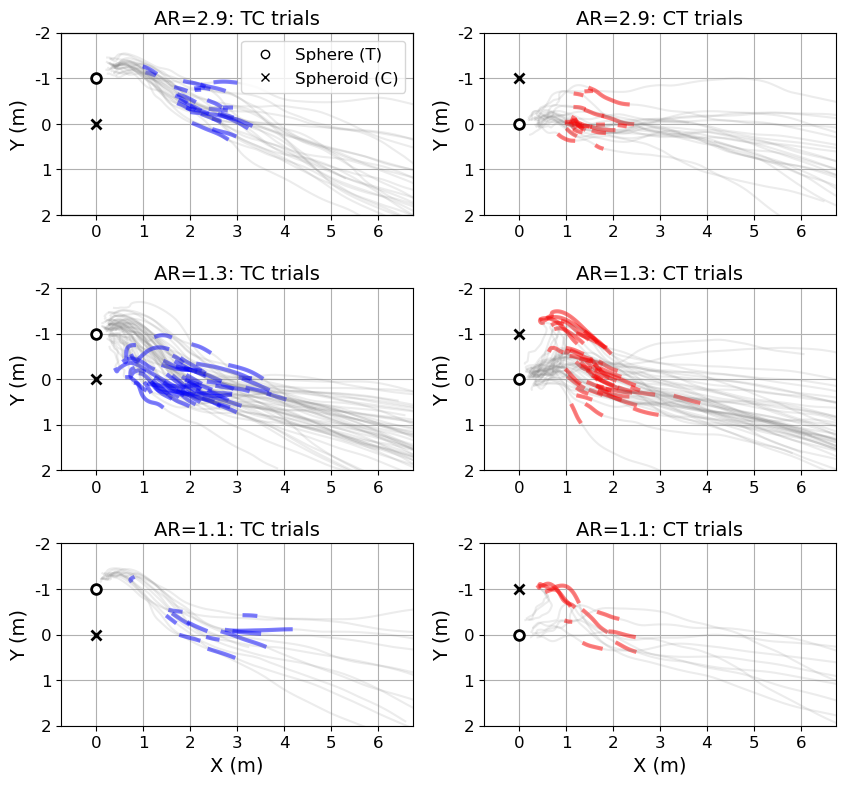

In [22]:
fig, ax_all = plt.subplots(3, 2, figsize=(10, 9), facecolor="w")

plt.subplots_adjust(hspace=0.4)



# ======================================
# TC trials last scan tracks
# ======================================
for sph_seq, sph in enumerate(["L", "M", "S"]):

    sph_index = (
        (df_summary["SPHEROID"]==sph)
        & (df_summary["CHOICE"]==1) &
        (df_summary["TRIAL_TO_INCLUDE"] == "Y")
    )
    df_wanted = df_summary[sph_index].copy()

    axx = ax_all[sph_seq, 0]
    for df_track, df_track_ls in zip(df_track_all[f"{sph}_TC"], df_track_ls_all[f"{sph}_TC"]):
        axx.plot(
            df_track[df_track["before_touch"]]["DTAG_X"],
            df_track[df_track["before_touch"]]["DTAG_Y"],
            color="grey", alpha=0.15
        )
        axx.plot(df_track_ls["DTAG_X"], df_track_ls["DTAG_Y"],
            color="b", lw=3, alpha=0.5
        )
    axx.plot(0, 0, "kx", markeredgewidth=2, markersize=7, lw=1.5)
    axx.plot(0, -1, "ko", markeredgewidth=2, markersize=7, lw=1.5, markerfacecolor="w")
    axx.set_title(f"{AR_NAME[sph]}: TC trials", fontsize=14)


# ======================================
# CT trials last scan tracks
# ======================================
for sph_seq, sph in enumerate(["L", "M", "S"]):

    sph_index = (
        (df_summary["SPHEROID"]==sph)
        & (df_summary["CHOICE"]==1) &
        (df_summary["TRIAL_TO_INCLUDE"] == "Y")
    )
    df_wanted = df_summary[sph_index].copy()

    axx = ax_all[sph_seq, 1]
    for df_track, df_track_ls in zip(df_track_all[f"{sph}_CT"], df_track_ls_all[f"{sph}_CT"]):
        axx.plot(
            df_track[df_track["before_touch"]]["DTAG_X"],
            df_track[df_track["before_touch"]]["DTAG_Y"],
            color="grey", alpha=0.15
        )
        axx.plot(df_track_ls["DTAG_X"], df_track_ls["DTAG_Y"],
            color="r", lw=3, alpha=0.5
        )
    axx.plot(0, 0, "ko", markeredgewidth=2, markersize=7, lw=1.5, markerfacecolor="w")
    axx.plot(0, -1, "kx", markeredgewidth=2, markersize=7, lw=1.5)
    axx.set_title(f"{AR_NAME[sph]}: CT trials", fontsize=14)


# Add legend for targets
ax_track_mock = plt.axes(ax_all[0, 0].get_position())
ax_track_mock.patch.set_alpha(0)
ax_track_mock.plot(np.nan, np.nan, "ko", label="Sphere (T)", markerfacecolor="w")
ax_track_mock.plot(np.nan, np.nan, "kx", label="Spheroid (C)")
ax_track_mock.set_xticks([])
ax_track_mock.set_yticks([])
ax_track_mock.legend(fontsize=12, loc="upper right")


# Adjust xy-limit of trajetory panels
for axx in np.hstack((ax_all[:, 0], ax_all[:, 1])):
    axx.set_xticks(np.arange(-1, 9))
    axx.set_xticklabels(np.arange(-1, 9), fontsize=12)
    axx.set_yticks(np.arange(-3, 4))
    axx.set_yticklabels(np.arange(-3, 4), fontsize=12)
    axx.set_ylim(2, -2)
    axx.set_xlim(-0.75, 6.75)
    axx.grid()
#     axx.set_xlabel("X (m)", fontsize=14)
    axx.set_ylabel("Y (m)", fontsize=14)

ax_all[2, 0].set_xlabel("X (m)", fontsize=14)
ax_all[2, 1].set_xlabel("X (m)", fontsize=14)

plt.show()